In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import json
import datetime
import time
import jsonlines
from PIL import Image
from scipy.optimize import curve_fit
import scipy as sy
import pickle as pkl
import seaborn as sns
from os.path import join as oj
import sklearn.model_selection
import sklearn.linear_model

PROCESSED_DIR = 'processed'
DIRECTIONS_DIR = '../data/annotation-dataset-stylegan2/linear_models/new' # path to many datasets, includes on directory before the below dirs
GENERATING_LATENTS_DIR = '../data/annotation-dataset-stylegan2/data'

# loading

**load gt latents**

In [2]:
latents = np.load(oj(GENERATING_LATENTS_DIR, 'W.npy'))

**load annotations in different directions**

In [3]:
annotations_dict = pkl.load(open(oj(PROCESSED_DIR, '01_annotations_dict.pkl'), 'rb'))
annotations_dict_names = pkl.load(open(oj(PROCESSED_DIR, '01_annotations_labels_dict.pkl'), 'rb'))

# rename keys
annotations_dict = {k.replace('calibration-random-v2-', '').replace('-000', ''): annotations_dict[k]
                    for k in annotations_dict}

# fitting better linear models

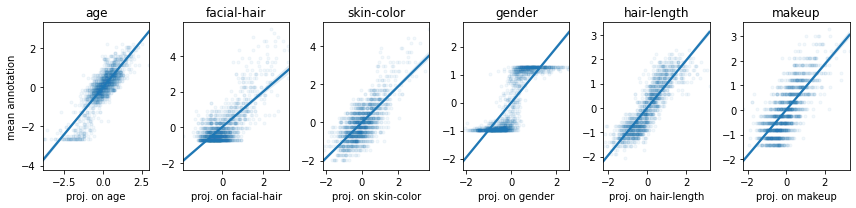

In [6]:
X = latents
attrs = ['age', 'facial-hair', 'skin-color', 'gender', 'hair-length', 'makeup']
R = 1
C = len(attrs)
plt.figure(figsize=(C * 2, 3))
for i, attr in enumerate(attrs):
    attr_to_proj = attr
    m = sklearn.linear_model.RidgeCV()
    y = annotations_dict[attr].mean(axis=1)
    y = (y - y.mean()) / (y.std())
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, test_size=0.3, random_state=42)
    m.fit(X_train, y_train)
    projections = m.predict(X_test)
    
    plt.subplot(R, C, i + 1)
    plt.title(attr)
    sns.regplot(projections, y_test, marker='.', scatter_kws={'alpha': 0.05})
    
    if i == 0:
        plt.ylabel('mean annotation')
    plt.xlabel(f'proj. on {attr_to_proj}')
#     plt.xlabel('projection onto linear direction')
#     plt.plot(projections, mean_attr, '.')
plt.tight_layout()